In [48]:
import pandas as pd
#!conda install -c conda-forge bqplot --yes
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
import bqplot
import datetime as dt
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
from ipywidgets import interact, interact_manual
%matplotlib inline

In [49]:
buildings = pd.read_csv("building_inventory.csv",
                        na_values = {'Congress Dist': 0,
                                     'Square Footage': 0,
                                     'Year Acquired': 0,
                                     'Year Constructed': 0,
                                     'Congress Dist': 0,
                                     'Total Floors': 0}) 
buildings = buildings.dropna()
buildings = buildings.drop_duplicates()
buildings = buildings.reset_index(drop=True)
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17.0,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975.0,1975.0,144.0,1.0,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17.0,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004.0,2004.0,144.0,1.0,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15.0,John Shimkus,118,Phelps Brandon W.,...,In Use,2000.0,2000.0,120.0,1.0,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16.0,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000.0,2000.0,144.0,1.0,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Eldon Hazlet State Park - Clinton County,Keyesport Road,Carlyle,62231,Clinton,15.0,John Shimkus,107,Cavaletto John,...,In Use,1999.0,1999.0,96.0,1.0,1,0,Storage,Storage,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476,Department of Military Affairs,Marion Readiness Center,11427 Minuteman Road,Marion,62959,Williamson,12.0,Mike Bost,117,Severin Dave,...,In Use,1991.0,1991.0,43000.0,1.0,0,0,Business,Education,Not provided
6477,Southern Illinois University,Southern Illinois University - Edwardsville,3690 Stadium Drive,Edwardsville,62025,Madison,13.0,Rodney L. Davis,112,Stuart Katie,...,In Use,2013.0,2013.0,1746.0,1.0,0,0,Education,Utiility & Miscellan,Not provided
6478,Southern Illinois University,Southern Illinois University - Edwardsville,3690 Stadium Drive,Edwardsville,62025,Madison,13.0,Rodney L. Davis,112,Stuart Katie,...,In Use,2012.0,2012.0,2715.0,1.0,0,0,Storage,Utiility & Miscellan,Not provided
6479,Southern Illinois University,Southern Illinois University - Edwardsville,65 Circle Drive,Edwardsville,62026,Madison,13.0,Rodney L. Davis,112,Stuart Katie,...,In Use,2014.0,2014.0,31455.0,4.0,0,0,Education,Assembly,Not provided


So I might be a little less chatty here than usual, because I'm writing this while on the flu and that ain't no waltz. This assignment seemed simple at first blush but once I dug my teeth into it I found that switching from numerical to non-numerical data caused things to go a bit cattywhompus. I didn't record all those errors in here while I stumbled through that, but there were many.

The turning point was when I realized that, for some reason, my na_values= portion of the code wasn't actually replacing any of the necessary NaN values. I checked on previous instances of trying this, and yeah, same issue. I'm not sure how to fix it precisely aside from dropping out anything with a NaN value. Once I did this, I started getting fewer errors and started being able to make visualizations properly. 

**Left component:**
- Grid heat map
- Rows are congressional district
- Columns are the governmental department (Agency Name)
- Values are sum of total square footage for that set of criteria

So as I said, trying to shift this over earlier had caused some issues with non-numerical data. Once I started making things work properly, first thing I did was make a test heat map with all numerical data. 


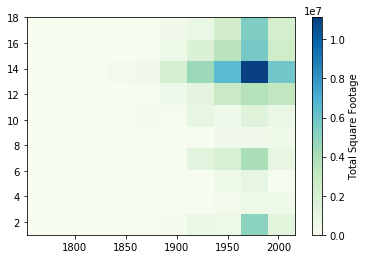

In [50]:
plt.hist2d(buildings['Year Acquired'], buildings['Congress Dist'], weights=buildings['Square Footage'], cmap='GnBu')
cb = plt.colorbar()
cb.set_label('Total Square Footage')

Alright, so I at least know it works. I swapped that out to the proper data fields (y = buildings['Agency Name'] and BOY HOWDY did that not work. It was at this point that I checked Slack, and I found Vel's question and your answer. I tried a few new code combinations, without much success, which was the point at which I asked for help myself. When you explained about the histogram indeed needing numerical data, and how we might need to reindex the Agency Name column to numerical values, a new plan clicked into place. I honestly hadn't realized that that was an option. 

First I got a list of all the unique values in Agency Name:

In [51]:
names = buildings["Agency Name"]
names2 = names.unique()
names2

array(['Department of Natural Resources', 'Department of Corrections',
       'Department of Human Services', 'Department of Transportation',
       'Department of State Police', 'Department of Military Affairs',
       'Department of Agriculture', 'Governors State University',
       'Department of Central Management Services',
       'Historic Preservation Agency', 'Department of Juvenile Justice',
       'Southern Illinois University',
       'Illinois Medical District Commission', 'University of Illinois',
       "Department of Veterans' Affairs", 'Chicago State University',
       'Northern Illinois University', 'Office of the Secretary of State',
       'Illinois Emergency Management Agency',
       'Western Illinois University', 'Illinois State University',
       'Eastern Illinois University', 'Northeastern Illinois University',
       'Illinois Community College Board',
       'Illinois Board of Higher Education',
       'IL State Board of Education', 'Department of Revenue',


So, that's a nice list of all those unique values. To associate each unique value with a number, I decided to run through a "for" loop to add a number for each value, and thus get a list of numbers to match per value.

In [52]:
n = 0
nlist = []
for name in names2:
    n = n+1
    nlist.append(n)
nlist

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35]

Now that I had a number list and an agency name list, I could run a for loop through each agency name in the table, and use a set of if statements to match each unique name to the corresponding number in the number in the number list. These numbers could then be put in a new list that corresponds to the full Agency Name column. I later realized that I could have probably just matched each unique name to a number directly, instead of going through the number list, but at this point I'm committed to taking the long way around.

In [53]:
indexlist = []
for name in names:
    if name == "Department of Natural Resources":
        q = nlist[0]
    if name == "Department of Corrections":
        q = nlist[1]
    if name == "Department of Human Services":
        q = nlist[2]
    if name == "Department of Transportation":
        q = nlist[3]
    if name == "Department of State Police":
        q = nlist[4]
    if name == "Department of Military Affairs":
        q = nlist[5]
    if name == "Department of Agriculture":
        q = nlist[6]
    if name == "Governors State University":
        q = nlist[7]
    if name == "Department of Central Management Services":
        q = nlist[8]
    if name == "Historic Preservation Agency":
        q = nlist[9]
    if name == "Department of Juvenile Justice":
        q = nlist[10]
    if name == "Southern Illinois University":
        q = nlist[11]
    if name == "Illinois Medical District Commission":
        q = nlist[12]
    if name == "Department of Veterans' Affairs":
        q = nlist[13]
    if name == "Chicago State University":
        q = nlist[14]
    if name == "Northern Illinois University":
        q = nlist[15]
    if name == "Office of the Secretary of State":
        q = nlist[16]
    if name == "Illinois Emergency Management Agency":
        q = nlist[17]
    if name == "Western Illinois University":
        q = nlist[18]
    if name == "Illinois State University":
        q = nlist[19]
    if name == "Eastern Illinois University":
        q = nlist[20]
    if name == "Northeastern Illinois University":
        q = nlist[21]
    if name == "Illinois Community College Board":
        q = nlist[22]
    if name == "Illinois Board of Higher Education":
        q = nlist[23]
    if name == "IL State Board of Education":
        q = nlist[24]
    if name == "Department of Revenue":
        q = nlist[25]
    if name == "Governor's Office":
        q = nlist[26]
    if name == "Office of the Attorney General":
        q = nlist[27]
    if name == "Appellate Court / Fourth District":
        q = nlist[28]
    if name == "Department of Public Health":
        q = nlist[29]
    if name == "Illinois Courts":
        q = nlist[30]
    if name == "Appellate Court / Third District":
        q = nlist[31]
    if name == "Appellate Court / Fifth District":
        q = nlist[32]
    if name == "Appellate Court / Second District":
        q = nlist[33]
    indexlist.append(q)
indexlist

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 4,
 5,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 9,
 1,
 1,
 1,
 1,
 1,
 10,
 1,
 1,
 2,
 1,
 1,
 1,
 10,
 10,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 11,
 2,
 4,
 12,
 12,
 13,
 1,
 1,
 10,
 10,
 10,
 10,
 10,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 2,
 4,
 4,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 2,
 2,
 2,
 11,
 4,
 4,
 4,
 5,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 11,
 2,
 11,
 4,
 4,
 4,
 7,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 12,
 12,
 12,
 12,
 1

Finally, appending my new agency index to the buildings dataframe:

In [54]:
buildings["Agency Index"] = indexlist
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3,Agency Index
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17.0,Cheri Bustos,93,Hammond Norine K.,...,1975.0,1975.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,1
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17.0,Cheri Bustos,93,Hammond Norine K.,...,2004.0,2004.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,1
2,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15.0,John Shimkus,118,Phelps Brandon W.,...,2000.0,2000.0,120.0,1.0,1,0,Unusual,Unusual,Not provided,1
3,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16.0,Adam Kinzinger,76,Long Jerry Lee,...,2000.0,2000.0,144.0,1.0,1,0,Unusual,Unusual,Not provided,1
4,Department of Natural Resources,Eldon Hazlet State Park - Clinton County,Keyesport Road,Carlyle,62231,Clinton,15.0,John Shimkus,107,Cavaletto John,...,1999.0,1999.0,96.0,1.0,1,0,Storage,Storage,Not provided,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476,Department of Military Affairs,Marion Readiness Center,11427 Minuteman Road,Marion,62959,Williamson,12.0,Mike Bost,117,Severin Dave,...,1991.0,1991.0,43000.0,1.0,0,0,Business,Education,Not provided,6
6477,Southern Illinois University,Southern Illinois University - Edwardsville,3690 Stadium Drive,Edwardsville,62025,Madison,13.0,Rodney L. Davis,112,Stuart Katie,...,2013.0,2013.0,1746.0,1.0,0,0,Education,Utiility & Miscellan,Not provided,12
6478,Southern Illinois University,Southern Illinois University - Edwardsville,3690 Stadium Drive,Edwardsville,62025,Madison,13.0,Rodney L. Davis,112,Stuart Katie,...,2012.0,2012.0,2715.0,1.0,0,0,Storage,Utiility & Miscellan,Not provided,12
6479,Southern Illinois University,Southern Illinois University - Edwardsville,65 Circle Drive,Edwardsville,62026,Madison,13.0,Rodney L. Davis,112,Stuart Katie,...,2014.0,2014.0,31455.0,4.0,0,0,Education,Assembly,Not provided,12


As you can see, each numerical value in Agency Index corresponds to the proper Agency Name. Now I can make the histogram properly. I also added some logorithmic normalization to the color scale, since it has only little variation. Finally, I added interactivity, so that the user could change the colorscheme.

In [55]:
@interact
def heat(color_scheme = plt.colormaps()):
    plt.hist2d(buildings['Agency Index'], buildings['Congress Dist'], weights=buildings['Square Footage'], cmap=color_scheme, 
               norm = mpl_colors.SymLogNorm(10))
    cb = plt.colorbar()
    cb.set_label('Total Square Footage')
    plt.show

interactive(children=(Dropdown(description='color_scheme', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', …

Now that this was all working, I went in with some clean-up code to transform, set the 0's to null values, etc.

In [56]:
@interact
def heat(color_scheme = plt.colormaps()):
    hist2d, long_edges, lat_edges = np.histogram2d(buildings['Agency Index'], 
                                                   buildings['Congress Dist'], 
                                                   weights=buildings['Square Footage'])
    hist2d = hist2d.T
    hist2d[hist2d <= 0] = np.nan
    hist2d = np.log10(hist2d)
    plt.imshow(hist2d, cmap=color_scheme, norm = mpl_colors.SymLogNorm(10))

interactive(children=(Dropdown(description='color_scheme', options=('Accent', 'Accent_r', 'Blues', 'Blues_r', …

And finally, moving it to bqplot!

Unfortunantly, I couldn't make the color scheme widget play as nicely with the bqplot code as with the matplotlib code. I'm not entirely sure what is wrong, and I feel like if I wacked at it hard enough I could find a way to integrate them as needed, but at this point I can only sit upright for about 15 minutes at a time so we'll have to call this a day. I have made an attempt at interactivity.

In [57]:
col_sc = bqplot.ColorScale(scheme="GnBu", 
                           min=np.nanmin(hist2d), 
                           max=np.nanmax(hist2d))
x_sc = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()
c_ax = bqplot.ColorAxis(scale = col_sc, 
                        orientation = 'vertical',
                        side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Agency')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label = 'Congressional District')
heat_map = bqplot.GridHeatMap(color = hist2d,
                              scales = {'color': col_sc,
                                        'row': y_sc,
                                        'column': x_sc},
                              interactions = {'click': 'select'},
                              anchor_style = {'fill':'violet'}, 
                              selected_style = {'opacity': 1.0},
                              unselected_style = {'opacity': 1.0})
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1: #only 1 selected
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] # grab data value
        mySelectedLabel.value = 'Total square footage(log) = ' + str(v) # set our label    
heat_map.observe(get_data_value, 'selected')
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel,fig])
myDashboard

Right component:

    line plot
    x is the year
    y is total square footage acquired that year

So I had a lot of trouble on this part, and I mean a LOT of trouble. The TA, Qiuyan, had to help me out a lot because I was having a rough time of things. The real game-changer was when she suggested I used groupby, which I had frankly forgotten about. Groupby turned out to be essential for stacking the right vairables together; without groupby, the line graphs turned out to be messy, spagetti-like, nonlinear strings. But let's see how a basic line graph looks.

In [58]:
i,j = 3,3
longs = [long_edges[j], long_edges[j+1]] 
lats = [lat_edges[i],lat_edges[i+1]]
region_mask = ((buildings['Agency Index'] >= lats[0]) & (buildings['Agency Index']<=lats[1]) &\
                (buildings['Congress Dist'] >= longs[0]) & (buildings['Congress Dist']<=longs[1]) )
grouped = buildings[region_mask].groupby("Year Acquired")["Square Footage"].sum()
years = grouped.index
sqft = grouped.values

In [59]:
x_scl = bqplot.LinearScale(min=buildings["Year Acquired"].min(),max=buildings["Year Acquired"].max())
y_scl = bqplot.LinearScale()
ax_xcl = bqplot.Axis(label='Date', scale=x_scl)
ax_ycl = bqplot.Axis(label='Total Square Footage', scale=y_scl, 
                    orientation='vertical', side='left')
totalfoot = bqplot.Lines(x = buildings.groupby("Year Acquired")["Square Footage"].sum().index,
                         y = buildings.groupby("Year Acquired")["Square Footage"].sum().values, 
                         scales={'x':x_scl, 'y':y_scl})
fig_dur = bqplot.Figure(marks = [totalfoot], axes = [ax_xcl, ax_ycl])
fig_dur

Figure(axes=[Axis(label='Date', scale=LinearScale(max=2016.0, min=1753.0)), Axis(label='Total Square Footage',…

Alright! And now we can pair that with the heat map graph. To me this seemed imperfect, as some of the boxes that are suppossed to reprisent zero-square foot areas seem to have line graphs, and some of the boxes that are suppossed to reprisent areas with square footage in them do not have corresponding line graphs. Qiuyan told me this was to be expected in places, and I look forward to dropping in on some office hours when I'm well again and asking you for feedback. 

In [60]:

totalfoot = bqplot.Lines(x = buildings.groupby("Year Acquired")["Square Footage"].sum().index,
                         y = buildings.groupby("Year Acquired")["Square Footage"].sum().values, 
                         scales={'x':x_scl, 'y':y_scl})
fig_dur = bqplot.Figure(marks = [totalfoot], axes = [ax_xcl, ax_ycl])

def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i,j = change['owner'].selected[0]
        v = hist2d[i,j] 
        mySelectedLabel.value = 'Total duration in log(sec) = ' + str(v) 
        longs = [long_edges[j], long_edges[j+1]]
        lats = [lat_edges[i],lat_edges[i+1]]
        region_mask = ((buildings['Agency Index'] >= lats[0]) & (buildings['Agency Index']<=lats[1]) &\
                (buildings['Congress Dist'] >= longs[0]) & (buildings['Congress Dist']<=longs[1]) )
        grouped = buildings[region_mask].groupby("Year Acquired")["Square Footage"].sum()
        years = grouped.index
        sqft = grouped.values
        totalfoot.x = years
        totalfoot.y = sqft

heat_map.observe(get_data_value, 'selected')
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_heatmap.layout.min_width='500px'
fig_dur.layout.min_width='500px'
        
myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig_heatmap,fig_dur])])
myDashboard

Things to think about:

    Can you keep the x and y ranges static on the line plot?
    Can you change the style?

The x and y ranges are already static in the line plot. I'm sad that I wasn't able to get the style change widget to work out in the end, but again, sick and already needed a lot of help to get this far. I look forward to coming in for office hours to figure this all out. Thank you for your patience in this entire mess. 